# Reproducibility & Reblicability survey 2021

## Import packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

In [2]:
rr = pd.read_csv('./Reproducibility survey (Responses).csv')

## Clean-up

In [3]:
questions = pd.DataFrame({'questions':list(rr.columns)})
questions

,questions
0,Timestamp
1,"According to you, how important is the Reprodu..."
2,"According to you, how important is the Reprodu..."
3,"According to you, how important is the Reprodu..."
4,How much do you consider Reproducibility and R...
5,Do you publish your code/data/reproducible exa...
6,Please tell us what restricts you from publish...
7,Tell us which Research Group/Geography Branch ...
8,Tell us what you think about R&R. What would h...


In [4]:
rr.columns = ['time','import_your', 'import_depart','import_future','consid_rr','publ','restrict','group','messages']
rr.head()

,time,import_your,import_depart,import_future,consid_rr,publ,restrict,group,messages
0,16/03/2021 16:18:13,Not Important,Moderately Important,Slightly Important,1,I don't do any of that,"I don't used the scientific method, I am quali...","Human Geography, Historical and Cultural Resea...",This is irrelevant for my own branch of geogra...
1,17/03/2021 07:06:50,Important,Important,Important,4,I don't do any of that,"Lack of skills, tools or knowledge of how to d...","Human Geography, Political Economy, Quantitati...",NaN
2,17/03/2021 08:20:56,Very Important,Very Important,Very Important,3,I don't do any of that,"Lack of skills, tools or knowledge of how to d...",Physical Geography,Training on how to do this and what the differ...
3,17/03/2021 08:42:44,Very Important,Very Important,Very Important,4,"Publish preprint on Arxiv, Osf, Eartharxiv, or...","Lack of skills, tools or knowledge of how to d...","Physical Geography, Glaciology Centre",NaN
4,16/03/2021 16:20:29,Very Important,Very Important,Very Important,4,"Publish source code for paper on Github, Rpub,...","Lack of skills, tools or knowledge of how to d...","Physical Geography, Research Initiative for th...",NaN


In [5]:
# variable for research group
rr['G'] =  np.where(rr.group.str.contains("Hydrology Group"), "Hydrology Group",
                   np.where(rr.group.str.contains("Glaciology Centre"), "Glaciology Centre",
                    np.where(rr.group.str.contains("Research Initiative for the Dynamic Global"), "Research Initiative for the Dynamic Global Environment",
                    np.where(rr.group.str.contains("Quantitative Spatial Science"), "Quantitative Spatial Science",
                    np.where(rr.group.str.contains("Political Economy"), "Political Economy",
                   np.where(rr.group.str.contains("Historical and Cultural"), "Historical and Cultural Research Group", np.nan))))))
# variable for bin
rr['bin'] =  np.where(rr.group.str.contains("Human"), "H",
                   np.where(rr.group.str.contains("Quantitative"), "H",
                   np.where(rr.group.str.contains("Physical"), "P", "P")))

# Composition of participants

In [6]:
gr = rr.loc[:,['group','consid_rr', 'bin', 'G']]

gr1 = gr.loc[:,['bin']].groupby(['bin']).size().reset_index(name ='count')
gr2 = gr.loc[:,['G']].groupby(['G']).size().reset_index(name ='count')
gr1

,bin,count
0,H,25
1,P,45


In [7]:
gr

,group,consid_rr,bin,G
0,"Human Geography, Historical and Cultural Resea...",1,H,Historical and Cultural Research Group
1,"Human Geography, Political Economy, Quantitati...",4,H,Quantitative Spatial Science
2,Physical Geography,3,P,nan
3,"Physical Geography, Glaciology Centre",4,P,Glaciology Centre
4,"Physical Geography, Research Initiative for th...",4,P,Research Initiative for the Dynamic Global Env...
...,...,...,...,...
65,"Human Geography, Political Economy",1,H,Political Economy
66,Political Economy,3,P,Political Economy
67,"Physical Geography, Research Initiative for th...",4,P,Research Initiative for the Dynamic Global Env...
68,"Human Geography, Political Economy",1,H,Political Economy


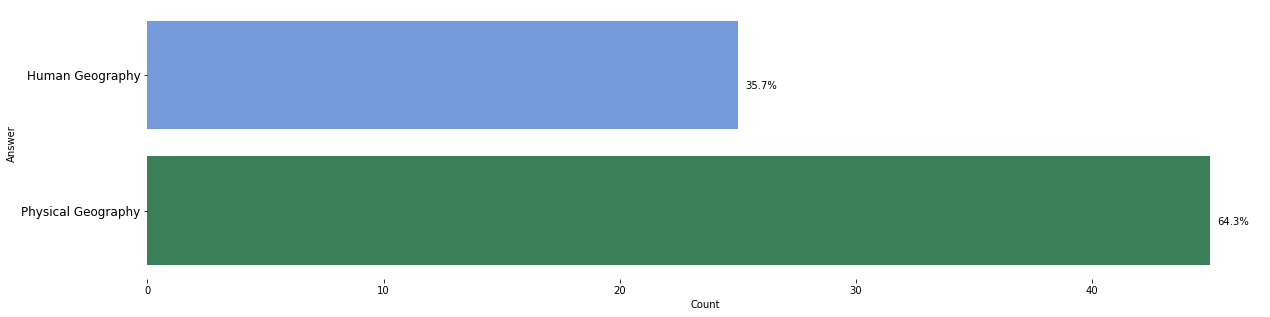

In [8]:
# Create bars and choose color
plt.figure(figsize=(20,5))
j = sns.barplot(x='count', y='bin', data = gr1, palette=sns.color_palette(['cornflowerblue', 'seagreen']))
loc, labels = plt.xticks()
j.set_yticklabels(labels=['Human Geography','Physical Geography'], size = 12)#, rotation=15);
j.set(xlabel='Count', ylabel='Answer')
#j.set_title(questions['questions'][7][:-18],size=15, pad = 15)
sns.despine(bottom = True, left = True)

for p in j.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/gr1['count'].sum())
    x = p.get_x() + p.get_width() + 0.3
    y = p.get_height() + p.get_y() - 0.3
    j.annotate(percentage, (x, y))
plt.show();



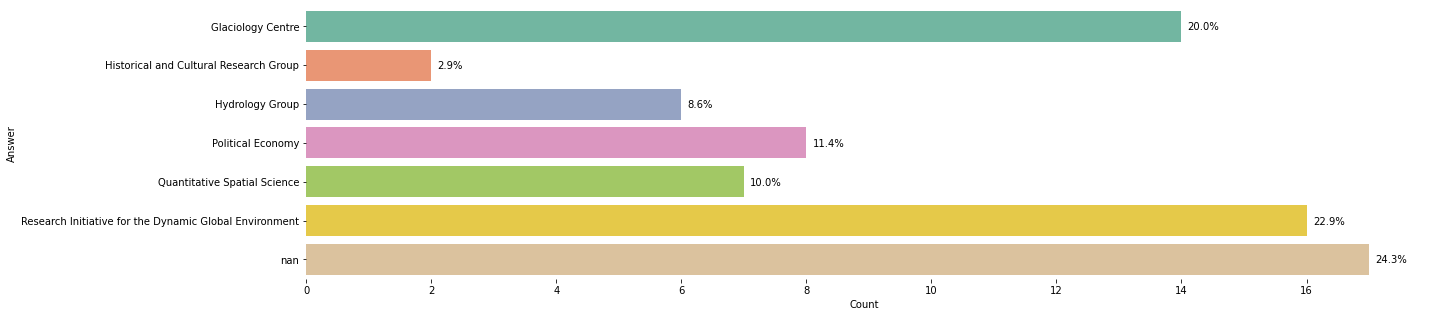

In [9]:
# Create bars and choose color
plt.figure(figsize=(20,5))
k = sns.barplot(x='count', y='G', data = gr2, palette=sns.color_palette('Set2'), order=gr2['G'])
k.set(xlabel='Count', ylabel='Answer')
#k.set_title(questions['questions'][7][:-18],size=15, pad = 15)
sns.despine(bottom = True, left = True)

for p in k.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/gr2['count'].sum())
    x = p.get_x() + p.get_width() + 0.1
    y = p.get_height() + p.get_y() - 0.3
    k.annotate(percentage, (x, y))
plt.show();

# Question N1

In [10]:
im = rr.loc[:,['import_your', 'import_depart','import_future']].melt(id_vars=[],
             var_name="quest",  # rename
             value_name="val")  # rename

im = im.groupby(['quest','val']).size().reset_index(name ='count')
im['quest'] = im['quest'].astype('category')
im['quest'] = im['quest'].cat.reorder_categories(['import_your','import_depart','import_future'])
im['val'] = im['val'].astype('category')
im['val'] = im['val'].cat.reorder_categories([ 'Not Important','Slightly Important','Moderately Important','Important','Very Important',])


im2 = rr.loc[:,['import_your', 'import_depart','import_future', 'bin']].melt(id_vars=['bin'],
             var_name="quest",  # rename
             value_name="val")  # rename

im2 = im2.groupby(['quest','val','bin']).size().reset_index(name ='count')
im2['quest'] = im2['quest'].astype('category')
im2['quest'] = im2['quest'].cat.reorder_categories(['import_your','import_depart','import_future'])
im2['val'] = im2['val'].astype('category')
im2['val'] = im2['val'].cat.reorder_categories([ 'Not Important','Slightly Important','Moderately Important','Important','Very Important',])

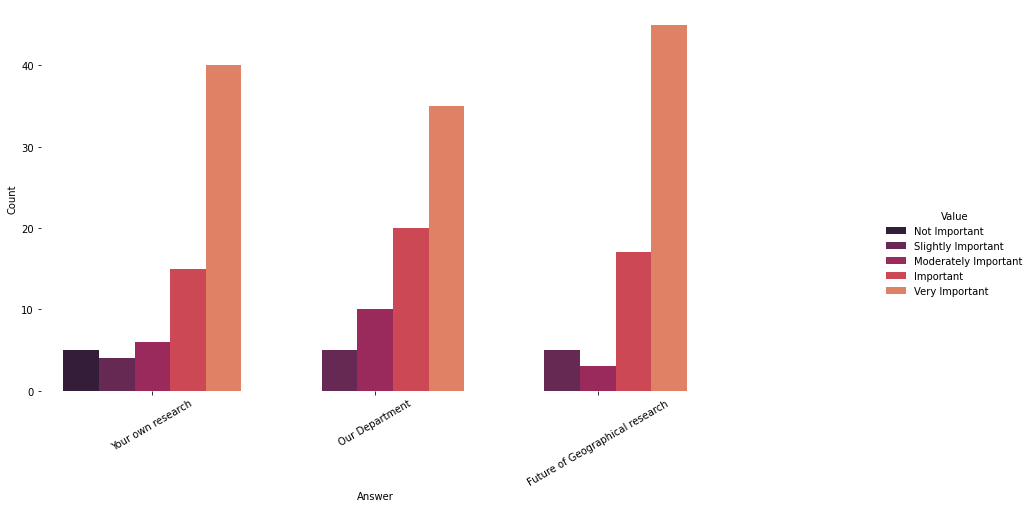

In [75]:
g = sns.catplot(x="quest", y="count", hue="val", kind="bar", data=im, palette=sns.color_palette("rocket"))
g.set_xticklabels(rotation=30)
g.fig.set_size_inches(15,6)
sns.despine(bottom = True, left = True)
g.set(xticklabels=['Your own research','Our Department','Future of Geographical research'])
g.set(xlabel='Answer', ylabel='Count')

for ax in g.axes.flat:
    leg = g.axes.flat[0].get_legend()
    if not leg is None: break
# or legend may be on a figure
if leg is None: leg = g._legend

leg.set_title('Value');
#g.fig.suptitle(questions['questions'][1][:-20],size=14, y=1.05);

In [12]:
im2.head()

,quest,val,bin,count
0,import_depart,Important,H,8
1,import_depart,Important,P,12
2,import_depart,Moderately Important,H,7
3,import_depart,Moderately Important,P,3
4,import_depart,Slightly Important,H,2


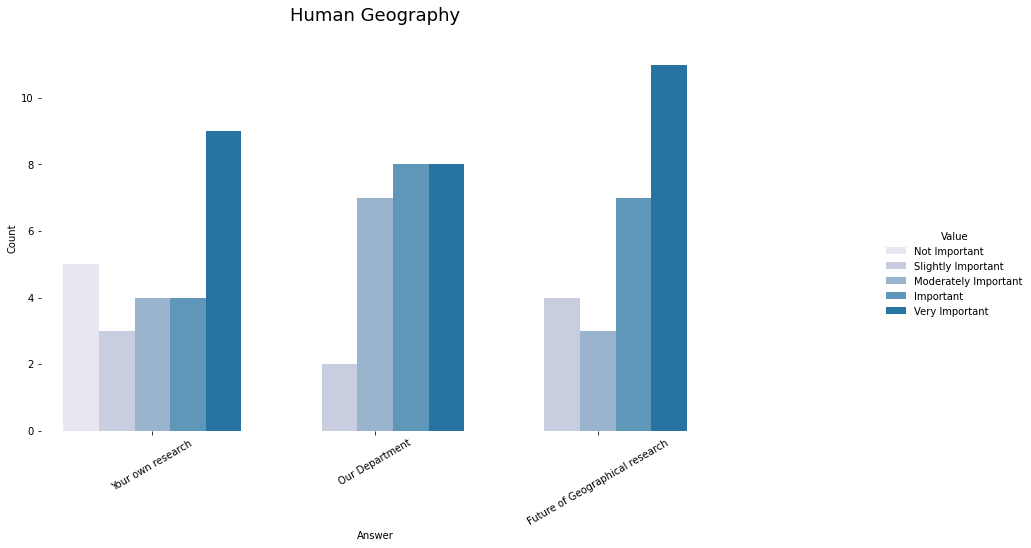

In [74]:
g = sns.catplot(x="quest", y="count", hue="val", kind="bar", data=im2[im2['bin'] == 'H'], palette=sns.color_palette("PuBu"))
g.set_xticklabels(rotation=30)
g.fig.set_size_inches(15,6)
sns.despine(bottom = True, left = True)
g.set(xticklabels=['Your own research','Our Department','Future of Geographical research'])
g.set(xlabel='Answer', ylabel='Count')

for ax in g.axes.flat:
    leg = g.axes.flat[0].get_legend()
    if not leg is None: break
# or legend may be on a figure
if leg is None: leg = g._legend

leg.set_title('Value')
#g.fig.suptitle(questions['questions'][1][:-20],size=14, y=1.05)
g.ax.set_title('Human Geography', size =18,  y=1.05);

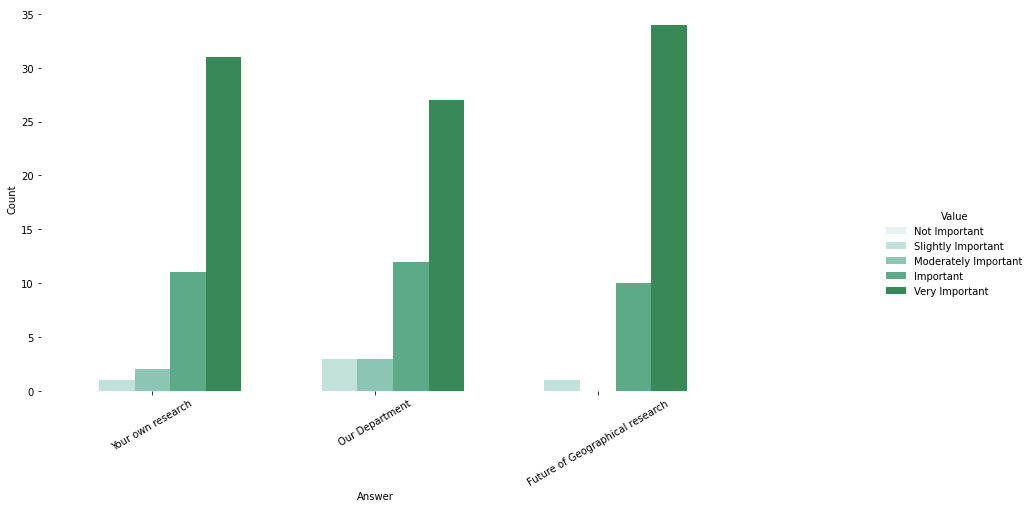

In [73]:
g = sns.catplot(x="quest", y="count", hue="val", kind="bar", data=im2[im2['bin'] == 'P'], palette=sns.color_palette("BuGn"))
g.set_xticklabels(rotation=30)
g.fig.set_size_inches(15,6)
sns.despine(bottom = True, left = True)
g.set(xticklabels=['Your own research','Our Department','Future of Geographical research'])
g.set(xlabel='Answer', ylabel='Count')

for ax in g.axes.flat:
    leg = g.axes.flat[0].get_legend()
    if not leg is None: break
# or legend may be on a figure
if leg is None: leg = g._legend

leg.set_title('Value');
#g.fig.suptitle(questions['questions'][1][:-20],size=14, y=1.05)
#g.ax.set_title('Physical Geography', size =18,  y=1.05) ;

In [15]:
# by reserach group

im3 = rr.loc[:,['import_your', 'import_depart','import_future', 'G']]


d = {"Not Important":1, "Slightly Important":2, "Moderately Important":3, "Important":4,"Very Important":5}

im3['your_rec'] = im3['import_your'].apply(lambda x: d.get(x))
im3['dep_rec'] = im3['import_depart'].apply(lambda x: d.get(x))
im3['fut_rec'] = im3['import_future'].apply(lambda x: d.get(x))


In [16]:
im3

,import_your,import_depart,import_future,G,your_rec,dep_rec,fut_rec
0,Not Important,Moderately Important,Slightly Important,Historical and Cultural Research Group,1,3,2
1,Important,Important,Important,Quantitative Spatial Science,4,4,4
2,Very Important,Very Important,Very Important,nan,5,5,5
3,Very Important,Very Important,Very Important,Glaciology Centre,5,5,5
4,Very Important,Very Important,Very Important,Research Initiative for the Dynamic Global Env...,5,5,5
...,...,...,...,...,...,...,...
65,Not Important,Important,Important,Political Economy,1,4,4
66,Important,Very Important,Very Important,Political Economy,4,5,5
67,Very Important,Very Important,Very Important,Research Initiative for the Dynamic Global Env...,5,5,5
68,Not Important,Important,Important,Political Economy,1,4,4


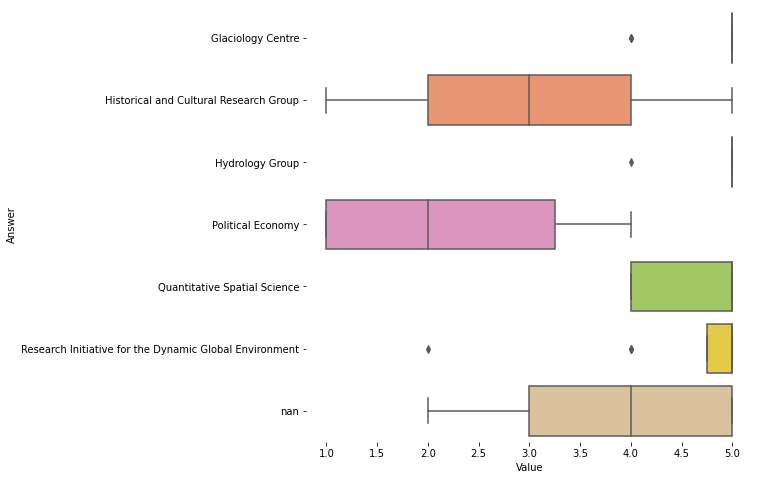

In [72]:

plt.figure(figsize=(8,8))
j = sns.boxplot(x='your_rec', y='G', data=im3,  palette=sns.color_palette('Set2'), order=gr2['G'])
j.set(ylabel='Answer', xlabel='Value')
sns.despine(bottom = True, left = True)
plt.show()

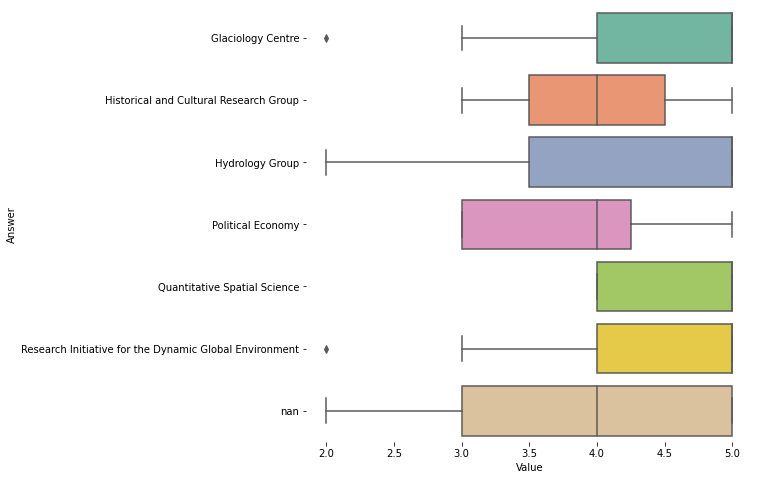

In [71]:
plt.figure(figsize=(8,8))
j = sns.boxplot(x='dep_rec', y='G', data=im3,  palette=sns.color_palette('Set2'), order=gr2['G'])
j.set(ylabel='Answer', xlabel='Value')
sns.despine(bottom = True, left = True)
plt.show()

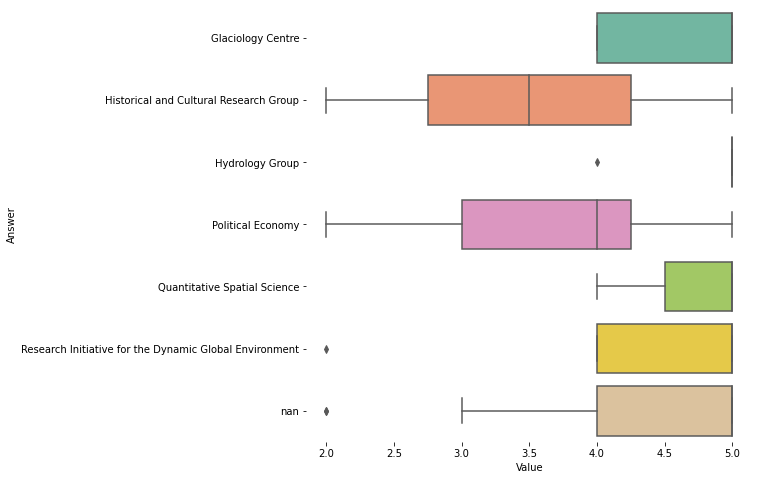

In [70]:
plt.figure(figsize=(8,8))
j = sns.boxplot(x='fut_rec', y='G', data=im3,  palette=sns.color_palette('Set2'), order=gr2['G'])
j.set(ylabel='Answer', xlabel='Value')
sns.despine(bottom = True, left = True)
plt.show()

# Question N2

In [20]:
cons = rr.loc[:,['consid_rr']].groupby(['consid_rr']).size().reset_index(name ='count')

cons2 =  rr.loc[:,['consid_rr', 'bin']].groupby(['consid_rr','bin']).size().reset_index(name ='count')

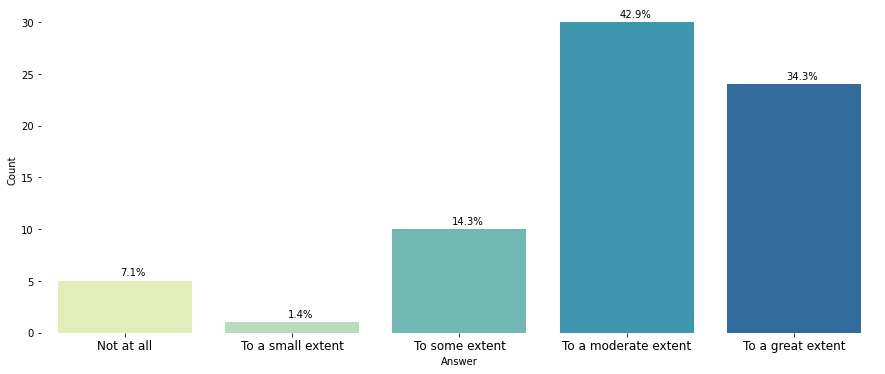

In [21]:
# Create bars and choose color
plt.figure(figsize=(15,6))
h = sns.barplot(x='consid_rr', y='count', data = cons, palette=sns.color_palette("YlGnBu"))
loc, labels = plt.xticks()
h.set_xticklabels(labels=['Not at all','To a small extent', 'To some extent', 'To a moderate extent','To a great extent'], size = 12)#, rotation=15);
h.set(xlabel='Answer', ylabel='Count')
#h.set_title(questions['questions'][4],size=15, pad=15)
sns.despine(bottom = True, left = True)

for p in h.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/cons['count'].sum())
    x = p.get_x() + p.get_width() - 0.35
    y = p.get_height() + 0.5
    h.annotate(percentage, (x, y),ha='center')
plt.show();




In [22]:
cons2

,consid_rr,bin,count
0,1,H,5
1,2,H,1
2,3,H,4
3,3,P,6
4,4,H,7
5,4,P,23
6,5,H,8
7,5,P,16


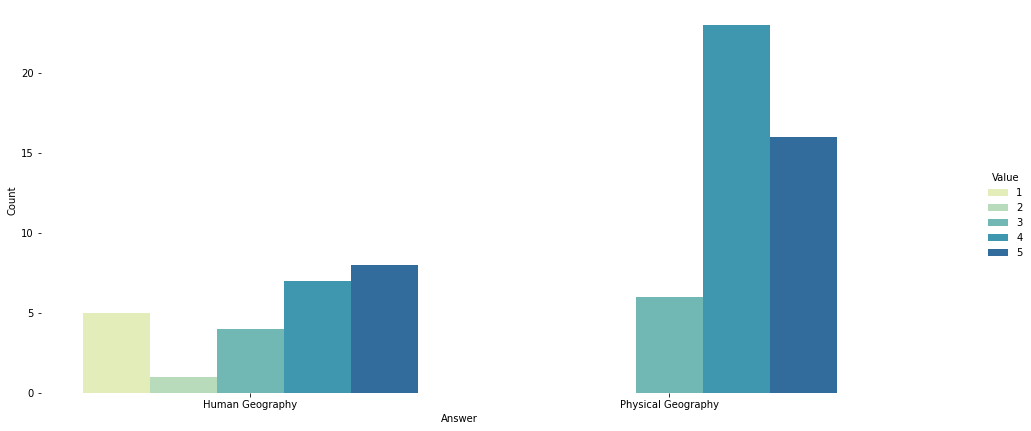

In [76]:
g = sns.catplot(x="bin", y="count", hue="consid_rr", kind="bar", data=cons2, palette=sns.color_palette("YlGnBu"))
#g.set_xticklabels(rotation=30)
g.fig.set_size_inches(15,6)
sns.despine(bottom = True, left = True)
g.set(xticklabels=['Human Geography','Physical Geography'])
g.set(xlabel='Answer', ylabel='Count')

for ax in g.axes.flat:
    leg = g.axes.flat[0].get_legend()
    if not leg is None: break
# or legend may be on a figure
if leg is None: leg = g._legend

leg.set_title('Value');
#g.ax.set_title(questions['questions'][4],size=15, pad=15);

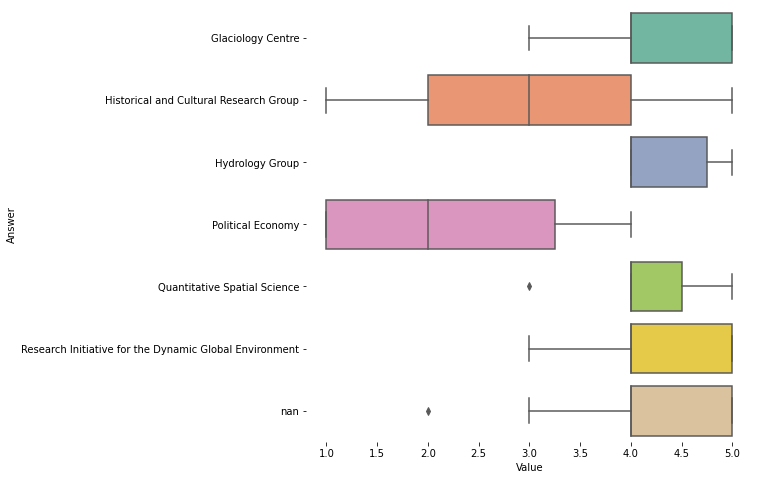

In [78]:
gr.loc[:,['bin','consid_rr']]

plt.figure(figsize=(8,8))
j = sns.boxplot(x='consid_rr', y='G', data=gr,  palette=sns.color_palette('Set2'), order=gr2['G'])
j.set(ylabel='Answer', xlabel='Value')
sns.despine(bottom = True, left = True)
#j.set_title(questions['questions'][4],size=15, pad=15)

plt.show()

# Question N3

In [25]:
pub = rr.loc[:,['publ']]

pub['pre_org'] =  np.where(pub.publ.str.contains("Preregister my research with a preregistration organization"), 1, 0)
pub['pub_pre'] =  np.where(pub.publ.str.contains("Publish preprint on Arxiv, Osf, Eartharxiv, or other distribution service/open-access archive"), 1, 0)
pub['dep'] = np.where(pub.publ.str.contains('Deposit data with data archives such as Figshare, Osf, or with the journal'),1,0)
pub['git'] = np.where(pub.publ.str.contains('Publish source code for paper on Github, Rpub, personal website or other publicly availiable platform'),1,0)
pub['pypi'] = np.where(pub.publ.str.contains('Distribute software package on CRAN, pypi, etc about my research'),1,0)
pub['non'] = np.where(pub.publ.str.contains("I don't do any of that"),1,0)

pub['sum'] = pub.pre_org + pub.pub_pre + pub.dep + pub.git + pub.pypi + pub.non
pub['o1'] = np.where(pub['sum'] < 1,1,0)

#pub['o2'] = np.where(pub.publ.str.contains("I hav"),1,0)

pub

,publ,pre_org,pub_pre,dep,git,pypi,non,sum,o1
0,I don't do any of that,0,0,0,0,0,1,1,0
1,I don't do any of that,0,0,0,0,0,1,1,0
2,I don't do any of that,0,0,0,0,0,1,1,0
3,"Publish preprint on Arxiv, Osf, Eartharxiv, or...",0,1,0,0,0,0,1,0
4,"Publish source code for paper on Github, Rpub,...",0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
65,I don't do any of that,0,0,0,0,0,1,1,0
66,I don't do any of that,0,0,0,0,0,1,1,0
67,"Publish preprint on Arxiv, Osf, Eartharxiv, or...",0,1,1,1,0,0,3,0
68,I don't do any of that,0,0,0,0,0,1,1,0


In [26]:
x = pub.iloc[:,[1,2,3,4,5,6,8]]
x.loc[:,['pre_org']].groupby(['pre_org']).size().reset_index(name ='count').rename(columns ={'pre_org':'var'})

,var,count
0,0,68
1,1,2


In [27]:
x = pub.iloc[:,[1,2,3,4,5,6,8]]

sums = pd.DataFrame()

for col in list(x.columns):
    df = x.loc[:,[col]].groupby([col]).size().reset_index(name ='count').rename(columns ={col:'bin'})
    df['var'] = col
    sums = pd.concat([sums,df])
    print('done')

done
done
done
done
done
done
done


In [28]:
sums = sums.reset_index(drop=True)
sums

,bin,count,var
0,0,68,pre_org
1,1,2,pre_org
2,0,54,pub_pre
3,1,16,pub_pre
4,0,41,dep
5,1,29,dep
6,0,41,git
7,1,29,git
8,0,66,pypi
9,1,4,pypi


In [29]:
list_perc = []

list_perc.append(round(100 * ( sums.iloc[0]['count']/sums.iloc[0:2]['count'].sum()  ),1)) 
list_perc.append(round(100 * ( sums.iloc[1]['count']/sums.iloc[0:2]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums.iloc[2]['count']/sums.iloc[2:4]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums.iloc[3]['count']/sums.iloc[2:4]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums.iloc[4]['count']/sums.iloc[4:6]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums.iloc[5]['count']/sums.iloc[4:6]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums.iloc[6]['count']/sums.iloc[6:8]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums.iloc[7]['count']/sums.iloc[6:8]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums.iloc[8]['count']/sums.iloc[8:10]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums.iloc[9]['count']/sums.iloc[8:10]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums.iloc[10]['count']/sums.iloc[10:12]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums.iloc[11]['count']/sums.iloc[10:12]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums.iloc[12]['count']/sums.iloc[12:14]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums.iloc[13]['count']/sums.iloc[12:14]['count'].sum()  ),1))  

sums['perc'] = pd.Series(list_perc)
sums

,bin,count,var,perc
0,0,68,pre_org,97.1
1,1,2,pre_org,2.9
2,0,54,pub_pre,77.1
3,1,16,pub_pre,22.9
4,0,41,dep,58.6
5,1,29,dep,41.4
6,0,41,git,58.6
7,1,29,git,41.4
8,0,66,pypi,94.3
9,1,4,pypi,5.7


In [30]:
list(sums['perc'])

[97.1,
 2.9,
 77.1,
 22.9,
 58.6,
 41.4,
 58.6,
 41.4,
 94.3,
 5.7,
 65.7,
 34.3,
 95.7,
 4.3]

In [31]:
[97.1,77.1,58.6,58.6,94.3, 65.7, 95.7,
 2.9,22.9,41.4,41.4, 5.7,34.3, 4.3]

[97.1,
 77.1,
 58.6,
 58.6,
 94.3,
 65.7,
 95.7,
 2.9,
 22.9,
 41.4,
 41.4,
 5.7,
 34.3,
 4.3]

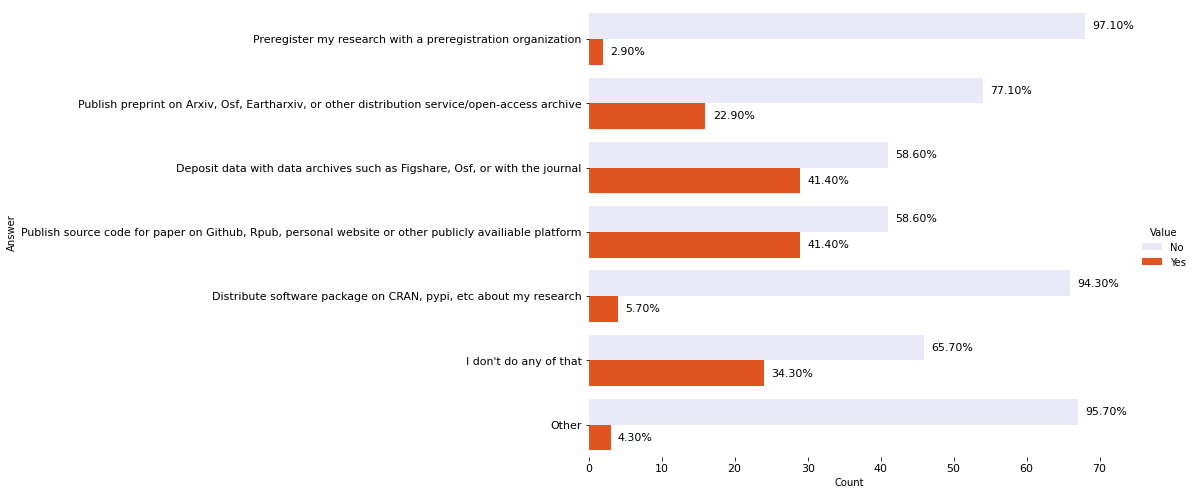

In [79]:
l = sns.catplot(x="count", y="var", hue="bin", kind="bar", data=sums, palette=sns.color_palette(['lavender','orangered']))
l.fig.set_size_inches(10,7)
l.set(yticklabels=["Preregister my research with a preregistration organization",
                   "Publish preprint on Arxiv, Osf, Eartharxiv, or other distribution service/open-access archive",
                   'Deposit data with data archives such as Figshare, Osf, or with the journal',
                   'Publish source code for paper on Github, Rpub, personal website or other publicly availiable platform',
                   'Distribute software package on CRAN, pypi, etc about my research',"I don't do any of that",'Other'])
l.set(ylabel='Answer', xlabel='Count')
#l.fig.suptitle(questions['questions'][5][:-18],size=14, y=1.06)
l.ax.tick_params(labelsize=11)
sns.despine(bottom = True, left = True)

li = [97.1,77.1,58.6,58.6,94.3, 65.7, 95.7,
 2.9,22.9,41.4,41.4, 5.7,34.3, 4.3]

for p,i in zip(l.ax.patches,li):
    width = p.get_width()    # get bar length
    l.ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}%'.format(i), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', size = 11)  # vertical alignment


for ax in l.axes.flat:
    leg = l.axes.flat[0].get_legend()
    if not leg is None: break
# or legend may be on a figure
if leg is None: leg = l._legend

leg.set_title('Value')
new_labels = ['No', 'Yes']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
    

    
plt.show();

In [82]:
pub = rr.loc[:,['publ', 'bin']]

pub['pre_org'] =  np.where(pub.publ.str.contains("Preregister my research with a preregistration organization"), 1, 0)
pub['pub_pre'] =  np.where(pub.publ.str.contains("Publish preprint on Arxiv, Osf, Eartharxiv, or other distribution service/open-access archive"), 1, 0)
pub['dep'] = np.where(pub.publ.str.contains('Deposit data with data archives such as Figshare, Osf, or with the journal'),1,0)
pub['git'] = np.where(pub.publ.str.contains('Publish source code for paper on Github, Rpub, personal website or other publicly availiable platform'),1,0)
pub['pypi'] = np.where(pub.publ.str.contains('Distribute software package on CRAN, pypi, etc about my research'),1,0)
pub['non'] = np.where(pub.publ.str.contains("I don't do any of that"),1,0)

pub['sum'] = pub.pre_org + pub.pub_pre + pub.dep + pub.git + pub.pypi + pub.non
pub['o1'] = np.where(pub['sum'] < 1,1,0)

#pub['o2'] = np.where(pub.publ.str.contains("I hav"),1,0)

pub

,publ,bin,pre_org,pub_pre,dep,git,pypi,non,sum,o1
0,I don't do any of that,H,0,0,0,0,0,1,1,0
1,I don't do any of that,H,0,0,0,0,0,1,1,0
2,I don't do any of that,P,0,0,0,0,0,1,1,0
3,"Publish preprint on Arxiv, Osf, Eartharxiv, or...",P,0,1,0,0,0,0,1,0
4,"Publish source code for paper on Github, Rpub,...",P,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
65,I don't do any of that,H,0,0,0,0,0,1,1,0
66,I don't do any of that,P,0,0,0,0,0,1,1,0
67,"Publish preprint on Arxiv, Osf, Eartharxiv, or...",P,0,1,1,1,0,0,3,0
68,I don't do any of that,H,0,0,0,0,0,1,1,0


In [83]:
x = pub.iloc[:,[1,2,3,4,5,6,7,9]]
x.loc[:,['pre_org','bin']].groupby(['pre_org','bin']).size()#.reset_index(name ='count').rename(columns ={'pre_org':'var'})

pre_org  bin
0        H      24
         P      44
1        H       1
         P       1
dtype: int64

In [84]:
x = pub.iloc[:,[2,3,4,5,6,7,9]]
y = pub.iloc[:,[1,2,3,4,5,6,7,9]]
sums = pd.DataFrame()

for col in list(x.columns):
    df = y.loc[:,[col,'bin']].groupby(['bin',col]).size().reset_index(name ='count').rename(columns ={col:'b'})
    df['var'] = col
    sums = pd.concat([sums,df])
    print('done')

done
done
done
done
done
done
done


In [85]:
sums_H = sums.loc[sums['bin']=='H'].reset_index(drop=True)
sums_P = sums.loc[sums['bin']=='P'].reset_index(drop=True)
sums_H

,bin,b,count,var
0,H,0,24,pre_org
1,H,1,1,pre_org
2,H,0,20,pub_pre
3,H,1,5,pub_pre
4,H,0,22,dep
5,H,1,3,dep
6,H,0,19,git
7,H,1,6,git
8,H,0,23,pypi
9,H,1,2,pypi


In [86]:
list_perc = []

list_perc.append(round(100 * ( sums_H.iloc[0]['count']/sums_H.iloc[0:2]['count'].sum()  ),1)) 
list_perc.append(round(100 * ( sums_H.iloc[1]['count']/sums_H.iloc[0:2]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums_H.iloc[2]['count']/sums_H.iloc[2:4]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums_H.iloc[3]['count']/sums_H.iloc[2:4]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums_H.iloc[4]['count']/sums_H.iloc[4:6]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums_H.iloc[5]['count']/sums_H.iloc[4:6]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums_H.iloc[6]['count']/sums_H.iloc[6:8]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums_H.iloc[7]['count']/sums_H.iloc[6:8]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums_H.iloc[8]['count']/sums_H.iloc[8:10]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums_H.iloc[9]['count']/sums_H.iloc[8:10]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums_H.iloc[10]['count']/sums_H.iloc[10:12]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums_H.iloc[11]['count']/sums_H.iloc[10:12]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums_H.iloc[12]['count']/sums_H.iloc[12:14]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums_H.iloc[13]['count']/sums_H.iloc[12:14]['count'].sum()  ),1))  

sums_H['perc'] = pd.Series(list_perc)
sums_H

,bin,b,count,var,perc
0,H,0,24,pre_org,96.0
1,H,1,1,pre_org,4.0
2,H,0,20,pub_pre,80.0
3,H,1,5,pub_pre,20.0
4,H,0,22,dep,88.0
5,H,1,3,dep,12.0
6,H,0,19,git,76.0
7,H,1,6,git,24.0
8,H,0,23,pypi,92.0
9,H,1,2,pypi,8.0


In [87]:
list_perc = []

list_perc.append(round(100 * ( sums_P.iloc[0]['count']/sums_P.iloc[0:2]['count'].sum()  ),1)) 
list_perc.append(round(100 * ( sums_P.iloc[1]['count']/sums_P.iloc[0:2]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums_P.iloc[2]['count']/sums_P.iloc[2:4]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums_P.iloc[3]['count']/sums_P.iloc[2:4]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums_P.iloc[4]['count']/sums_P.iloc[4:6]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums_P.iloc[5]['count']/sums_P.iloc[4:6]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums_P.iloc[6]['count']/sums_P.iloc[6:8]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums_P.iloc[7]['count']/sums_P.iloc[6:8]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums_P.iloc[8]['count']/sums_P.iloc[8:10]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums_P.iloc[9]['count']/sums_P.iloc[8:10]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums_P.iloc[10]['count']/sums_P.iloc[10:12]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums_P.iloc[11]['count']/sums_P.iloc[10:12]['count'].sum()  ),1))  

list_perc.append(round(100 * ( sums_P.iloc[12]['count']/sums_P.iloc[12:14]['count'].sum()  ),1))  
list_perc.append(round(100 * ( sums_P.iloc[13]['count']/sums_P.iloc[12:14]['count'].sum()  ),1))  

sums_P['perc'] = pd.Series(list_perc)
sums_P

,bin,b,count,var,perc
0,P,0,44,pre_org,97.8
1,P,1,1,pre_org,2.2
2,P,0,34,pub_pre,75.6
3,P,1,11,pub_pre,24.4
4,P,0,19,dep,42.2
5,P,1,26,dep,57.8
6,P,0,22,git,48.9
7,P,1,23,git,51.1
8,P,0,43,pypi,95.6
9,P,1,2,pypi,4.4


In [88]:
sums_H.loc[sums_H['b'] == 1]

,bin,b,count,var,perc
1,H,1,1,pre_org,4.0
3,H,1,5,pub_pre,20.0
5,H,1,3,dep,12.0
7,H,1,6,git,24.0
9,H,1,2,pypi,8.0
11,H,1,16,non,64.0
13,H,1,1,o1,4.0


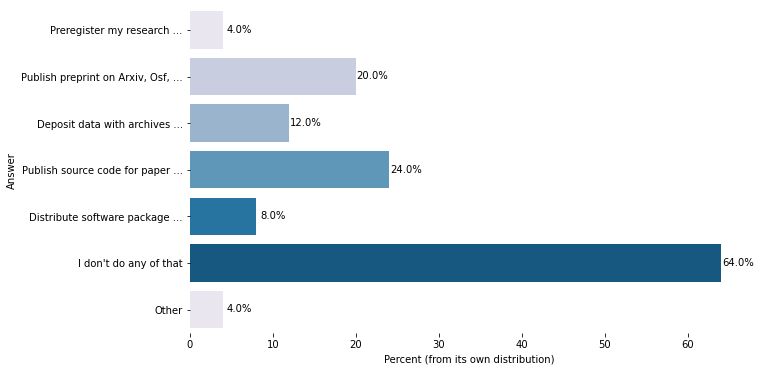

In [89]:
# Create bars and choose color
plt.figure(figsize=(10,6))
h = sns.barplot(x='perc', y='var', data = sums_H.loc[sums_H['b'] == 1], palette=sns.color_palette("PuBu"))
loc, labels = plt.xticks()
h.set_yticklabels(labels=["Preregister my research ...",
                   "Publish preprint on Arxiv, Osf, ...",
                   'Deposit data with archives ...',
                   'Publish source code for paper ...',
                   'Distribute software package ...',"I don't do any of that",'Other'])
h.set(ylabel='Answer', xlabel='Percent (from its own distribution)')
sns.despine(bottom = True, left = True)


for p in h.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    x = p.get_width() + 2
    y = p.get_y()  + p.get_height() - 0.35
    h.annotate(percentage, (x, y),ha='center')
    

plt.show();

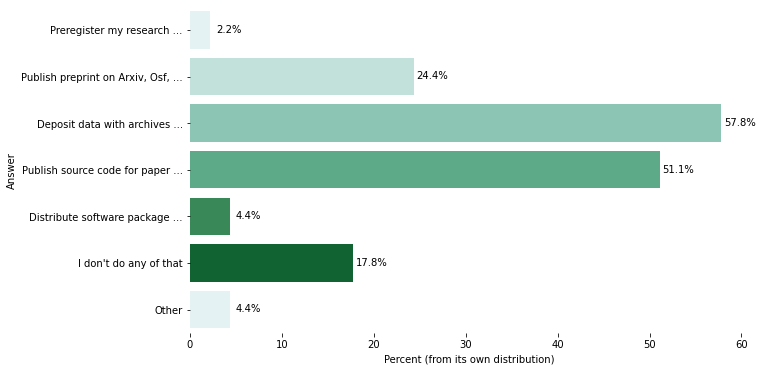

In [90]:
# Create bars and choose color
plt.figure(figsize=(10,6))
h = sns.barplot(x='perc', y='var', data = sums_P.loc[sums_P['b'] == 1], palette=sns.color_palette("BuGn"))
loc, labels = plt.xticks()
h.set_yticklabels(labels=["Preregister my research ...",
                   "Publish preprint on Arxiv, Osf, ...",
                   'Deposit data with archives ...',
                   'Publish source code for paper ...',
                   'Distribute software package ...',"I don't do any of that",'Other'])
h.set(ylabel='Answer', xlabel='Percent (from its own distribution)')
sns.despine(bottom = True, left = True)

for p in h.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    x = p.get_width() + 2
    y = p.get_y()  + p.get_height() - 0.35
    h.annotate(percentage, (x, y),ha='center')
    

plt.show();

# Question N4

In [91]:
#restrict

res = rr.loc[:,['restrict']]

res['no'] =  np.where(res.restrict.str.contains("No restrictions"), 1, 0)
res['sens'] =  np.where(res.restrict.str.contains("Sensitive research/data"), 1, 0)
res['lack'] = np.where(res.restrict.str.contains('Lack of skills, tools or knowledge of how to do that'),1,0)
res['peer'] = np.where(res.restrict.str.contains('peers'),1,0)
res['time'] = np.where(res.restrict.str.contains('time'),1,0)

res['sum'] = res.no + res.sens +res.lack +res.peer +res.time
res['o1'] = np.where(res['sum'] < 1,1,0)

res

,restrict,no,sens,lack,peer,time,sum,o1
0,"I don't used the scientific method, I am quali...",0,0,0,0,0,0,1
1,"Lack of skills, tools or knowledge of how to d...",0,0,1,0,0,1,0
2,"Lack of skills, tools or knowledge of how to d...",0,0,1,0,0,1,0
3,"Lack of skills, tools or knowledge of how to d...",0,0,1,0,0,1,0
4,"Lack of skills, tools or knowledge of how to d...",0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
65,No restrictions,1,0,0,0,0,1,0
66,"Lack of skills, tools or knowledge of how to d...",0,0,1,0,0,1,0
67,"Lack of skills, tools or knowledge of how to d...",0,0,1,0,0,1,0
68,Sensitive research/data,0,1,0,0,0,1,0


In [92]:
y = res.iloc[:,[1,2,3,4,5,7]]

resu = pd.DataFrame()

for col in list(y.columns):
    df = y.loc[:,[col]].groupby([col]).size().reset_index(name ='count').rename(columns ={col:'bin'})
    df['var'] = col
    resu = pd.concat([resu,df])
    print('done')

done
done
done
done
done
done


In [93]:
resu = resu.reset_index(drop=True)
resu

,bin,count,var
0,0,52,no
1,1,18,no
2,0,51,sens
3,1,19,sens
4,0,45,lack
5,1,25,lack
6,0,64,peer
7,1,6,peer
8,0,46,time
9,1,24,time


In [94]:
list_resu = []

list_resu.append(round(100 * ( resu.iloc[0]['count']/resu.iloc[0:2]['count'].sum()  ),1)) 
list_resu.append(round(100 * ( resu.iloc[1]['count']/resu.iloc[0:2]['count'].sum()  ),1))  

list_resu.append(round(100 * ( resu.iloc[2]['count']/resu.iloc[2:4]['count'].sum()  ),1))  
list_resu.append(round(100 * ( resu.iloc[3]['count']/resu.iloc[2:4]['count'].sum()  ),1))  

list_resu.append(round(100 * ( resu.iloc[4]['count']/resu.iloc[4:6]['count'].sum()  ),1))  
list_resu.append(round(100 * ( resu.iloc[5]['count']/resu.iloc[4:6]['count'].sum()  ),1))  

list_resu.append(round(100 * ( resu.iloc[6]['count']/resu.iloc[6:8]['count'].sum()  ),1))  
list_resu.append(round(100 * ( resu.iloc[7]['count']/resu.iloc[6:8]['count'].sum()  ),1))  

list_resu.append(round(100 * ( resu.iloc[8]['count']/resu.iloc[8:10]['count'].sum()  ),1))  
list_resu.append(round(100 * ( resu.iloc[9]['count']/resu.iloc[8:10]['count'].sum()  ),1))  

list_resu.append(round(100 * ( resu.iloc[10]['count']/resu.iloc[10:12]['count'].sum()  ),1))  
list_resu.append(round(100 * ( resu.iloc[11]['count']/resu.iloc[10:12]['count'].sum()  ),1))  


resu['perc'] = pd.Series(list_resu)
resu

,bin,count,var,perc
0,0,52,no,74.3
1,1,18,no,25.7
2,0,51,sens,72.9
3,1,19,sens,27.1
4,0,45,lack,64.3
5,1,25,lack,35.7
6,0,64,peer,91.4
7,1,6,peer,8.6
8,0,46,time,65.7
9,1,24,time,34.3


In [95]:
list(resu['perc'])

[74.3, 25.7, 72.9, 27.1, 64.3, 35.7, 91.4, 8.6, 65.7, 34.3, 94.3, 5.7]

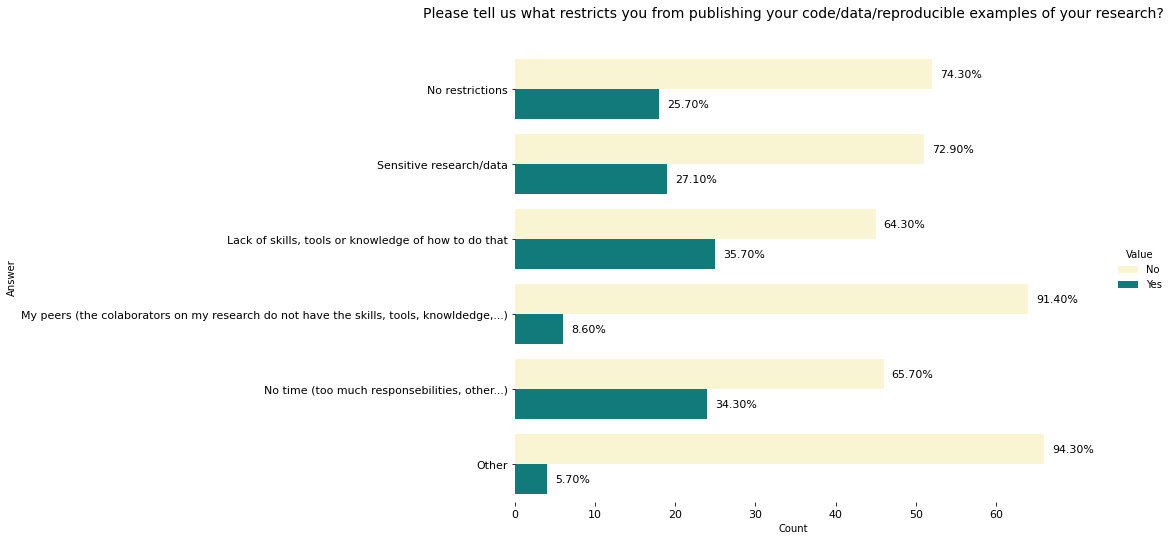

In [98]:
l = sns.catplot(x="count", y="var", hue="bin", kind="bar", data=resu, palette=sns.color_palette(['lemonchiffon','darkcyan']))
l.fig.set_size_inches(10,7)
l.set(yticklabels=["No restrictions",
                   "Sensitive research/data",
                   'Lack of skills, tools or knowledge of how to do that',
                   'My peers (the colaborators on my research do not have the skills, tools, knowldedge,...)',
                   'No time (too much responsebilities, other...)',
                  'Other'])
l.set(ylabel='Answer', xlabel='Count')
l.fig.suptitle(questions['questions'][6][:-18],size=14, y=1.06)
l.ax.tick_params(labelsize=11)
sns.despine(bottom = True, left = True)


li = [74.3,72.9, 64.3, 91.4, 65.7, 94.3, 
25.7, 27.1, 35.7, 8.6,34.3,  5.7]

for p,i in zip(l.ax.patches,li):
    width = p.get_width()    # get bar length
    l.ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}%'.format(i), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', size = 11)  # vertical alignment

for ax in l.axes.flat:
    leg = l.axes.flat[0].get_legend()
    if not leg is None: break
# or legend may be on a figure
if leg is None: leg = l._legend

leg.set_title('Value')
new_labels = ['No', 'Yes']
for t, l in zip(leg.texts, new_labels): t.set_text(l)


plt.show();

In [99]:
list(resu['perc'])

[74.3, 25.7, 72.9, 27.1, 64.3, 35.7, 91.4, 8.6, 65.7, 34.3, 94.3, 5.7]

In [100]:
res = rr.loc[:,['restrict','bin']]

res['no'] =  np.where(res.restrict.str.contains("No restrictions"), 1, 0)
res['sens'] =  np.where(res.restrict.str.contains("Sensitive research/data"), 1, 0)
res['lack'] = np.where(res.restrict.str.contains('Lack of skills, tools or knowledge of how to do that'),1,0)
res['peer'] = np.where(res.restrict.str.contains('peers'),1,0)
res['time'] = np.where(res.restrict.str.contains('time'),1,0)

res['sum'] = res.no + res.sens +res.lack +res.peer +res.time
res['o1'] = np.where(res['sum'] < 1,1,0)

res

,restrict,bin,no,sens,lack,peer,time,sum,o1
0,"I don't used the scientific method, I am quali...",H,0,0,0,0,0,0,1
1,"Lack of skills, tools or knowledge of how to d...",H,0,0,1,0,0,1,0
2,"Lack of skills, tools or knowledge of how to d...",P,0,0,1,0,0,1,0
3,"Lack of skills, tools or knowledge of how to d...",P,0,0,1,0,0,1,0
4,"Lack of skills, tools or knowledge of how to d...",P,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
65,No restrictions,H,1,0,0,0,0,1,0
66,"Lack of skills, tools or knowledge of how to d...",P,0,0,1,0,0,1,0
67,"Lack of skills, tools or knowledge of how to d...",P,0,0,1,0,0,1,0
68,Sensitive research/data,H,0,1,0,0,0,1,0


In [101]:
res.iloc[:,8]

0     1
1     0
2     0
3     0
4     0
     ..
65    0
66    0
67    0
68    0
69    0
Name: o1, Length: 70, dtype: int32

In [102]:
x = res.iloc[:,[2,3,4,5,6,8]]
y = res.iloc[:,[1,2,3,4,5,6,8]]
resu = pd.DataFrame()

for col in list(x.columns):
    df = y.loc[:,[col,'bin']].groupby(['bin',col]).size().reset_index(name ='count').rename(columns ={col:'b'})
    df['var'] = col
    resu = pd.concat([resu,df])
    print('done')

done
done
done
done
done
done


In [103]:
resu = resu.reset_index(drop=True)
resu

,bin,b,count,var
0,H,0,19,no
1,H,1,6,no
2,P,0,33,no
3,P,1,12,no
4,H,0,16,sens
5,H,1,9,sens
6,P,0,35,sens
7,P,1,10,sens
8,H,0,16,lack
9,H,1,9,lack


In [104]:
resu_H = resu.loc[resu['bin']=='H'].reset_index(drop=True)
resu_P = resu.loc[resu['bin']=='P'].reset_index(drop=True)
resu_H
resu_P

,bin,b,count,var
0,P,0,33,no
1,P,1,12,no
2,P,0,35,sens
3,P,1,10,sens
4,P,0,29,lack
5,P,1,16,lack
6,P,0,40,peer
7,P,1,5,peer
8,P,0,27,time
9,P,1,18,time


In [105]:
list_resu_H = []

list_resu_H.append(round(100 * ( resu_H.iloc[0]['count']/resu_H.iloc[0:2]['count'].sum()  ),1)) 
list_resu_H.append(round(100 * ( resu_H.iloc[1]['count']/resu_H.iloc[0:2]['count'].sum()  ),1))  

list_resu_H.append(round(100 * ( resu_H.iloc[2]['count']/resu_H.iloc[2:4]['count'].sum()  ),1))  
list_resu_H.append(round(100 * ( resu_H.iloc[3]['count']/resu_H.iloc[2:4]['count'].sum()  ),1))  

list_resu_H.append(round(100 * ( resu_H.iloc[4]['count']/resu_H.iloc[4:6]['count'].sum()  ),1))  
list_resu_H.append(round(100 * ( resu_H.iloc[5]['count']/resu_H.iloc[4:6]['count'].sum()  ),1))  

list_resu_H.append(round(100 * ( resu_H.iloc[6]['count']/resu_H.iloc[6:8]['count'].sum()  ),1))  
list_resu_H.append(round(100 * ( resu_H.iloc[7]['count']/resu_H.iloc[6:8]['count'].sum()  ),1))  

list_resu_H.append(round(100 * ( resu_H.iloc[8]['count']/resu_H.iloc[8:10]['count'].sum()  ),1))  
list_resu_H.append(round(100 * ( resu_H.iloc[9]['count']/resu_H.iloc[8:10]['count'].sum()  ),1))  

list_resu_H.append(round(100 * ( resu_H.iloc[10]['count']/resu_H.iloc[10:12]['count'].sum()  ),1))  
list_resu_H.append(round(100 * ( resu_H.iloc[11]['count']/resu_H.iloc[10:12]['count'].sum()  ),1))  


resu_H['perc'] = pd.Series(list_resu_H)
resu_H

,bin,b,count,var,perc
0,H,0,19,no,76.0
1,H,1,6,no,24.0
2,H,0,16,sens,64.0
3,H,1,9,sens,36.0
4,H,0,16,lack,64.0
5,H,1,9,lack,36.0
6,H,0,24,peer,96.0
7,H,1,1,peer,4.0
8,H,0,19,time,76.0
9,H,1,6,time,24.0


In [106]:
list_resu_P = []

list_resu_P.append(round(100 * ( resu_P.iloc[0]['count']/resu_P.iloc[0:2]['count'].sum()  ),1)) 
list_resu_P.append(round(100 * ( resu_P.iloc[1]['count']/resu_P.iloc[0:2]['count'].sum()  ),1))  

list_resu_P.append(round(100 * ( resu_P.iloc[2]['count']/resu_P.iloc[2:4]['count'].sum()  ),1))  
list_resu_P.append(round(100 * ( resu_P.iloc[3]['count']/resu_P.iloc[2:4]['count'].sum()  ),1))  

list_resu_P.append(round(100 * ( resu_P.iloc[4]['count']/resu_P.iloc[4:6]['count'].sum()  ),1))  
list_resu_P.append(round(100 * ( resu_P.iloc[5]['count']/resu_P.iloc[4:6]['count'].sum()  ),1))  

list_resu_P.append(round(100 * ( resu_P.iloc[6]['count']/resu_P.iloc[6:8]['count'].sum()  ),1))  
list_resu_P.append(round(100 * ( resu_P.iloc[7]['count']/resu_P.iloc[6:8]['count'].sum()  ),1))  

list_resu_P.append(round(100 * ( resu_P.iloc[8]['count']/resu_P.iloc[8:10]['count'].sum()  ),1))  
list_resu_P.append(round(100 * ( resu_P.iloc[9]['count']/resu_P.iloc[8:10]['count'].sum()  ),1))  

list_resu_P.append(round(100 * ( resu_P.iloc[10]['count']/resu_P.iloc[10:11]['count'].sum()  ),1))   


resu_P['perc'] = pd.Series(list_resu_P)
resu_P = resu_P.append({'bin': 'P', 'b':1,'count':0, 'var':'o1','perc':0.0}, ignore_index=True)
resu_P

,bin,b,count,var,perc
0,P,0,33,no,73.3
1,P,1,12,no,26.7
2,P,0,35,sens,77.8
3,P,1,10,sens,22.2
4,P,0,29,lack,64.4
5,P,1,16,lack,35.6
6,P,0,40,peer,88.9
7,P,1,5,peer,11.1
8,P,0,27,time,60.0
9,P,1,18,time,40.0


In [107]:
resu_H.loc[resu_H['b'] == 1]

,bin,b,count,var,perc
1,H,1,6,no,24.0
3,H,1,9,sens,36.0
5,H,1,9,lack,36.0
7,H,1,1,peer,4.0
9,H,1,6,time,24.0
11,H,1,4,o1,16.0


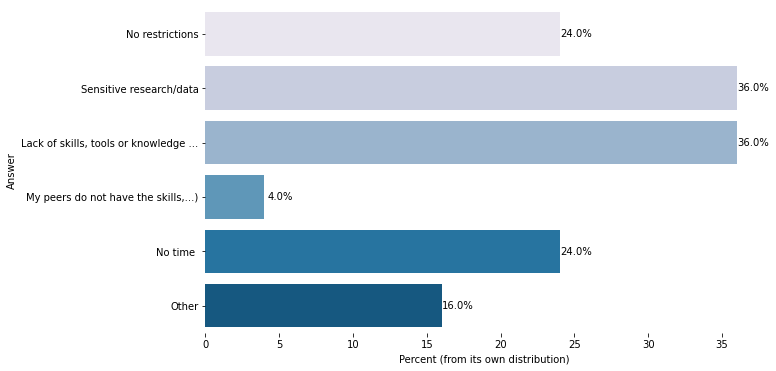

In [108]:
# Create bars and choose color
plt.figure(figsize=(10,6))
h = sns.barplot(x='perc', y='var', data = resu_H.loc[resu_H['b'] == 1], palette=sns.color_palette("PuBu"))
loc, labels = plt.xticks()
h.set_yticklabels(labels=["No restrictions",
                   "Sensitive research/data",
                   'Lack of skills, tools or knowledge ...',
                   'My peers do not have the skills,...)',
                   'No time ',
                  'Other'])
h.set(ylabel='Answer', xlabel='Percent (from its own distribution)')
sns.despine(bottom = True, left = True)

for p in h.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    x = p.get_width() +1.1
    y = p.get_y()  + p.get_height() - 0.35
    h.annotate(percentage, (x, y),ha='center')
    

plt.show();

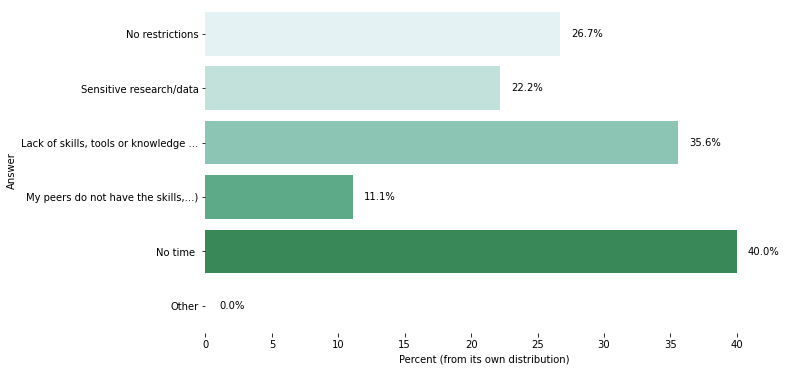

In [109]:
# Create bars and choose color
plt.figure(figsize=(10,6))
h = sns.barplot(x='perc', y='var', data = resu_P.loc[resu_P['b'] == 1], palette=sns.color_palette("BuGn"))
loc, labels = plt.xticks()
h.set_yticklabels(labels=["No restrictions",
                   "Sensitive research/data",
                   'Lack of skills, tools or knowledge ...',
                   'My peers do not have the skills,...)',
                   'No time ',
                  'Other'])
h.set(ylabel='Answer', xlabel='Percent (from its own distribution)')
sns.despine(bottom = True, left = True)

for p in h.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    x = p.get_width() + 2
    y = p.get_y()  + p.get_height() - 0.35
    h.annotate(percentage, (x, y),ha='center')
    

plt.show();

# comments

In [110]:
rr.messages[rr.messages.notnull()].reset_index(drop = True)[2]

'This is definitely relevant. More focus needs to be placed on this in the dept, and at the start of research, not as a tickbox exercise at the end. No training is given as asummed supervisors will explain or train PhDs, and post-docs assumed to know already. Rarely questions asked in seminars about R&R.'

In [111]:
rr.messages[rr.messages.notnull()].reset_index(drop = True)[10]

"I would be very interested in attending R&R workshops. I don't have much experience of how things are done at Bristol, but I have benefited in the past from established data management infrastructure/staff. This has massively helped in collating and publishing data and the organisation of samples. "

In [112]:
# cheat way how to export images at once
!jupyter nbconvert --to markdown *.ipynb

[NbConvertApp] Converting notebook Report.ipynb to markdown
[NbConvertApp] Writing 10128 bytes to Report.md
[NbConvertApp] Converting notebook reproducibility.ipynb to markdown
[NbConvertApp] Support files will be in reproducibility_files\
[NbConvertApp] Making directory reproducibility_files
[NbConvertApp] Making directory reproducibility_files
[NbConvertApp] Making directory reproducibility_files
[NbConvertApp] Making directory reproducibility_files
[NbConvertApp] Making directory reproducibility_files
[NbConvertApp] Making directory reproducibility_files
[NbConvertApp] Making directory reproducibility_files
[NbConvertApp] Making directory reproducibility_files
[NbConvertApp] Making directory reproducibility_files
[NbConvertApp] Making directory reproducibility_files
[NbConvertApp] Making directory reproducibility_files
[NbConvertApp] Making directory reproducibility_files
[NbConvertApp] Making directory reproducibility_files
[NbConvertApp] Making directory reproducibility_files
[NbC